In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import opensmile
import os


In [2]:
def extract_audio_feature(input_file, feature_file):
    wav_vad_files = os.listdir(input_file)

    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.emobase,
        feature_level=opensmile.FeatureLevel.Functionals,
    )

    emobase_Functionals_feature_path = os.path.join(feature_file, "emobase_Functionals_val_features.csv")

    count = 0
    for wav_vad in wav_vad_files:
        wav_vad_path = os.path.join(input_file, wav_vad)
        # print(wav_vad_path)
        feature = smile.process_file(wav_vad_path)
        
        if count == 0:
            feature.to_csv(emobase_Functionals_feature_path, mode='a', index=False)
        else:
            feature.to_csv(emobase_Functionals_feature_path, mode='a', header=False, index=False)
        count += 1

# def extract_audio_feature(input_file, feature_file):
#     wav_vad_files = os.listdir(input_file)

#     smile = opensmile.Smile(
#         feature_set=opensmile.FeatureSet.eGeMAPSv02,
#         feature_level=opensmile.FeatureLevel.Functionals,
#     )

#     eGeMAPSv02_Functionals_feature_path = os.path.join(feature_file, "eGeMAPSv02_Functionals_features.csv")

#     count = 0
#     for wav_vad in wav_vad_files:
#         wav_vad_path = os.path.join(input_file, wav_vad)
#         # print(wav_vad_path)
#         feature = smile.process_file(wav_vad_path)
        
#         if count == 0:
#             feature.to_csv(eGeMAPSv02_Functionals_feature_path, mode='a', index=False)
#         else:
#             feature.to_csv(eGeMAPSv02_Functionals_feature_path, mode='a', header=False, index=False)
#         count += 1

# extract_audio_feature(input_file=r'D:\Projects\Speech_Depression\data\val\audio_val', feature_file=r'D:\Projects\Speech_Depression\features')


In [3]:
df = pd.read_csv(r'D:\Projects\Speech_Depression\data\others\all_features_label.csv')
df['PHQ-9']

0      18
1      12
2       8
3       9
4       9
       ..
117     5
118     6
119     0
120     5
121     1
Name: PHQ-9, Length: 122, dtype: int64

In [4]:
# 初始化一个空的DataFrame来存储结果
correlation_results = []

for feature in df.columns[:-1]:  # 遍历所有HSF特征列（PHQ-9是最后一列）
    corr, p_value = pearsonr(df[feature], df['PHQ-9'])
    correlation_results.append({'Feature': feature, 'Correlation': corr, 'p-value': p_value})

# 转换为DataFrame
correlation_results = pd.DataFrame(correlation_results)

D:\local temp\ipykernel_16896\3359774949.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(df[feature], df['PHQ-9'])


In [5]:
correlation_results

,Feature,Correlation,p-value
0,audspec_lengthL1norm_sma_range,-0.037021,0.685599
1,audspec_lengthL1norm_sma_maxPos,0.036430,0.690357
2,audspec_lengthL1norm_sma_minPos,-0.132356,0.146148
3,audspec_lengthL1norm_sma_quartile1,-0.052401,0.566491
4,audspec_lengthL1norm_sma_quartile2,0.046420,0.611647
...,...,...,...
7444,MeanVoicedSegmentLengthSec,0.054375,0.551942
7445,StddevVoicedSegmentLengthSec,0.060740,0.506305
7446,MeanUnvoicedSegmentLength,0.093202,0.307220
7447,StddevUnvoicedSegmentLength,0.109852,0.228393


In [6]:
significant_features = correlation_results[correlation_results['p-value'] < 0.01]
significant_features

,Feature,Correlation,p-value
115,pcm_zcr_sma_upleveltime90,0.265169,0.003160
341,audSpec_Rfilt_sma[3]_range,0.237168,0.008531
354,audSpec_Rfilt_sma[3]_skewness,0.321544,0.000305
355,audSpec_Rfilt_sma[3]_kurtosis,0.349987,0.000078
356,audSpec_Rfilt_sma[3]_meanSegLen,0.293062,0.001053
...,...,...,...
7033,mfcc_sma_de[7]_quartile2.1,0.255959,0.004433
7163,lspFreq_sma_de[1]_skewness,-0.278008,0.001932
7164,lspFreq_sma_de[1]_kurtosis,0.250135,0.005458
7195,lspFreq_sma_de[3]_amean,-0.238406,0.008183


In [7]:
# train_df = pd.read_csv(r'D:\Projects\Speech_Depression\data\others\all_train_features_label.csv')
# val_df = pd.read_csv(r'D:\Projects\Speech_Depression\data\others\all_val_features_label.csv')

In [8]:
# significant_data = val_df[significant_features['Feature'].values]
# significant_data.to_csv(r'D:\Projects\Speech_Depression\features\significant_val_feature_151.csv', index=False)

In [9]:
# significant_data = train_df[significant_features['Feature'].values]

# # to csv
# significant_data.to_csv(r'D:\Projects\Speech_Depression\features\significant_train_feature_151.csv', index=False)

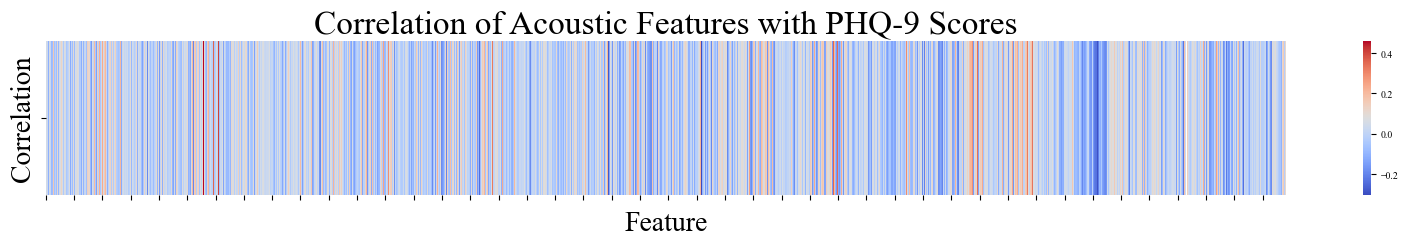

In [22]:
correlation_results

# 提取相关系数
significant_correlations = correlation_results[['Feature', 'Correlation']]

# 转换为适合热图绘制的格式
heatmap_data = significant_correlations.set_index('Feature').T

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# 绘制热图
plt.figure(figsize=(20, 2))  # 调整图的大小以适应横向显示
ax = sns.heatmap(heatmap_data, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation of Acoustic Features with PHQ-9 Scores')
ax.set_xticklabels([])

# 调整颜色条的字体大小
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=6)  # 设置颜色条的字体大小

plt.show()

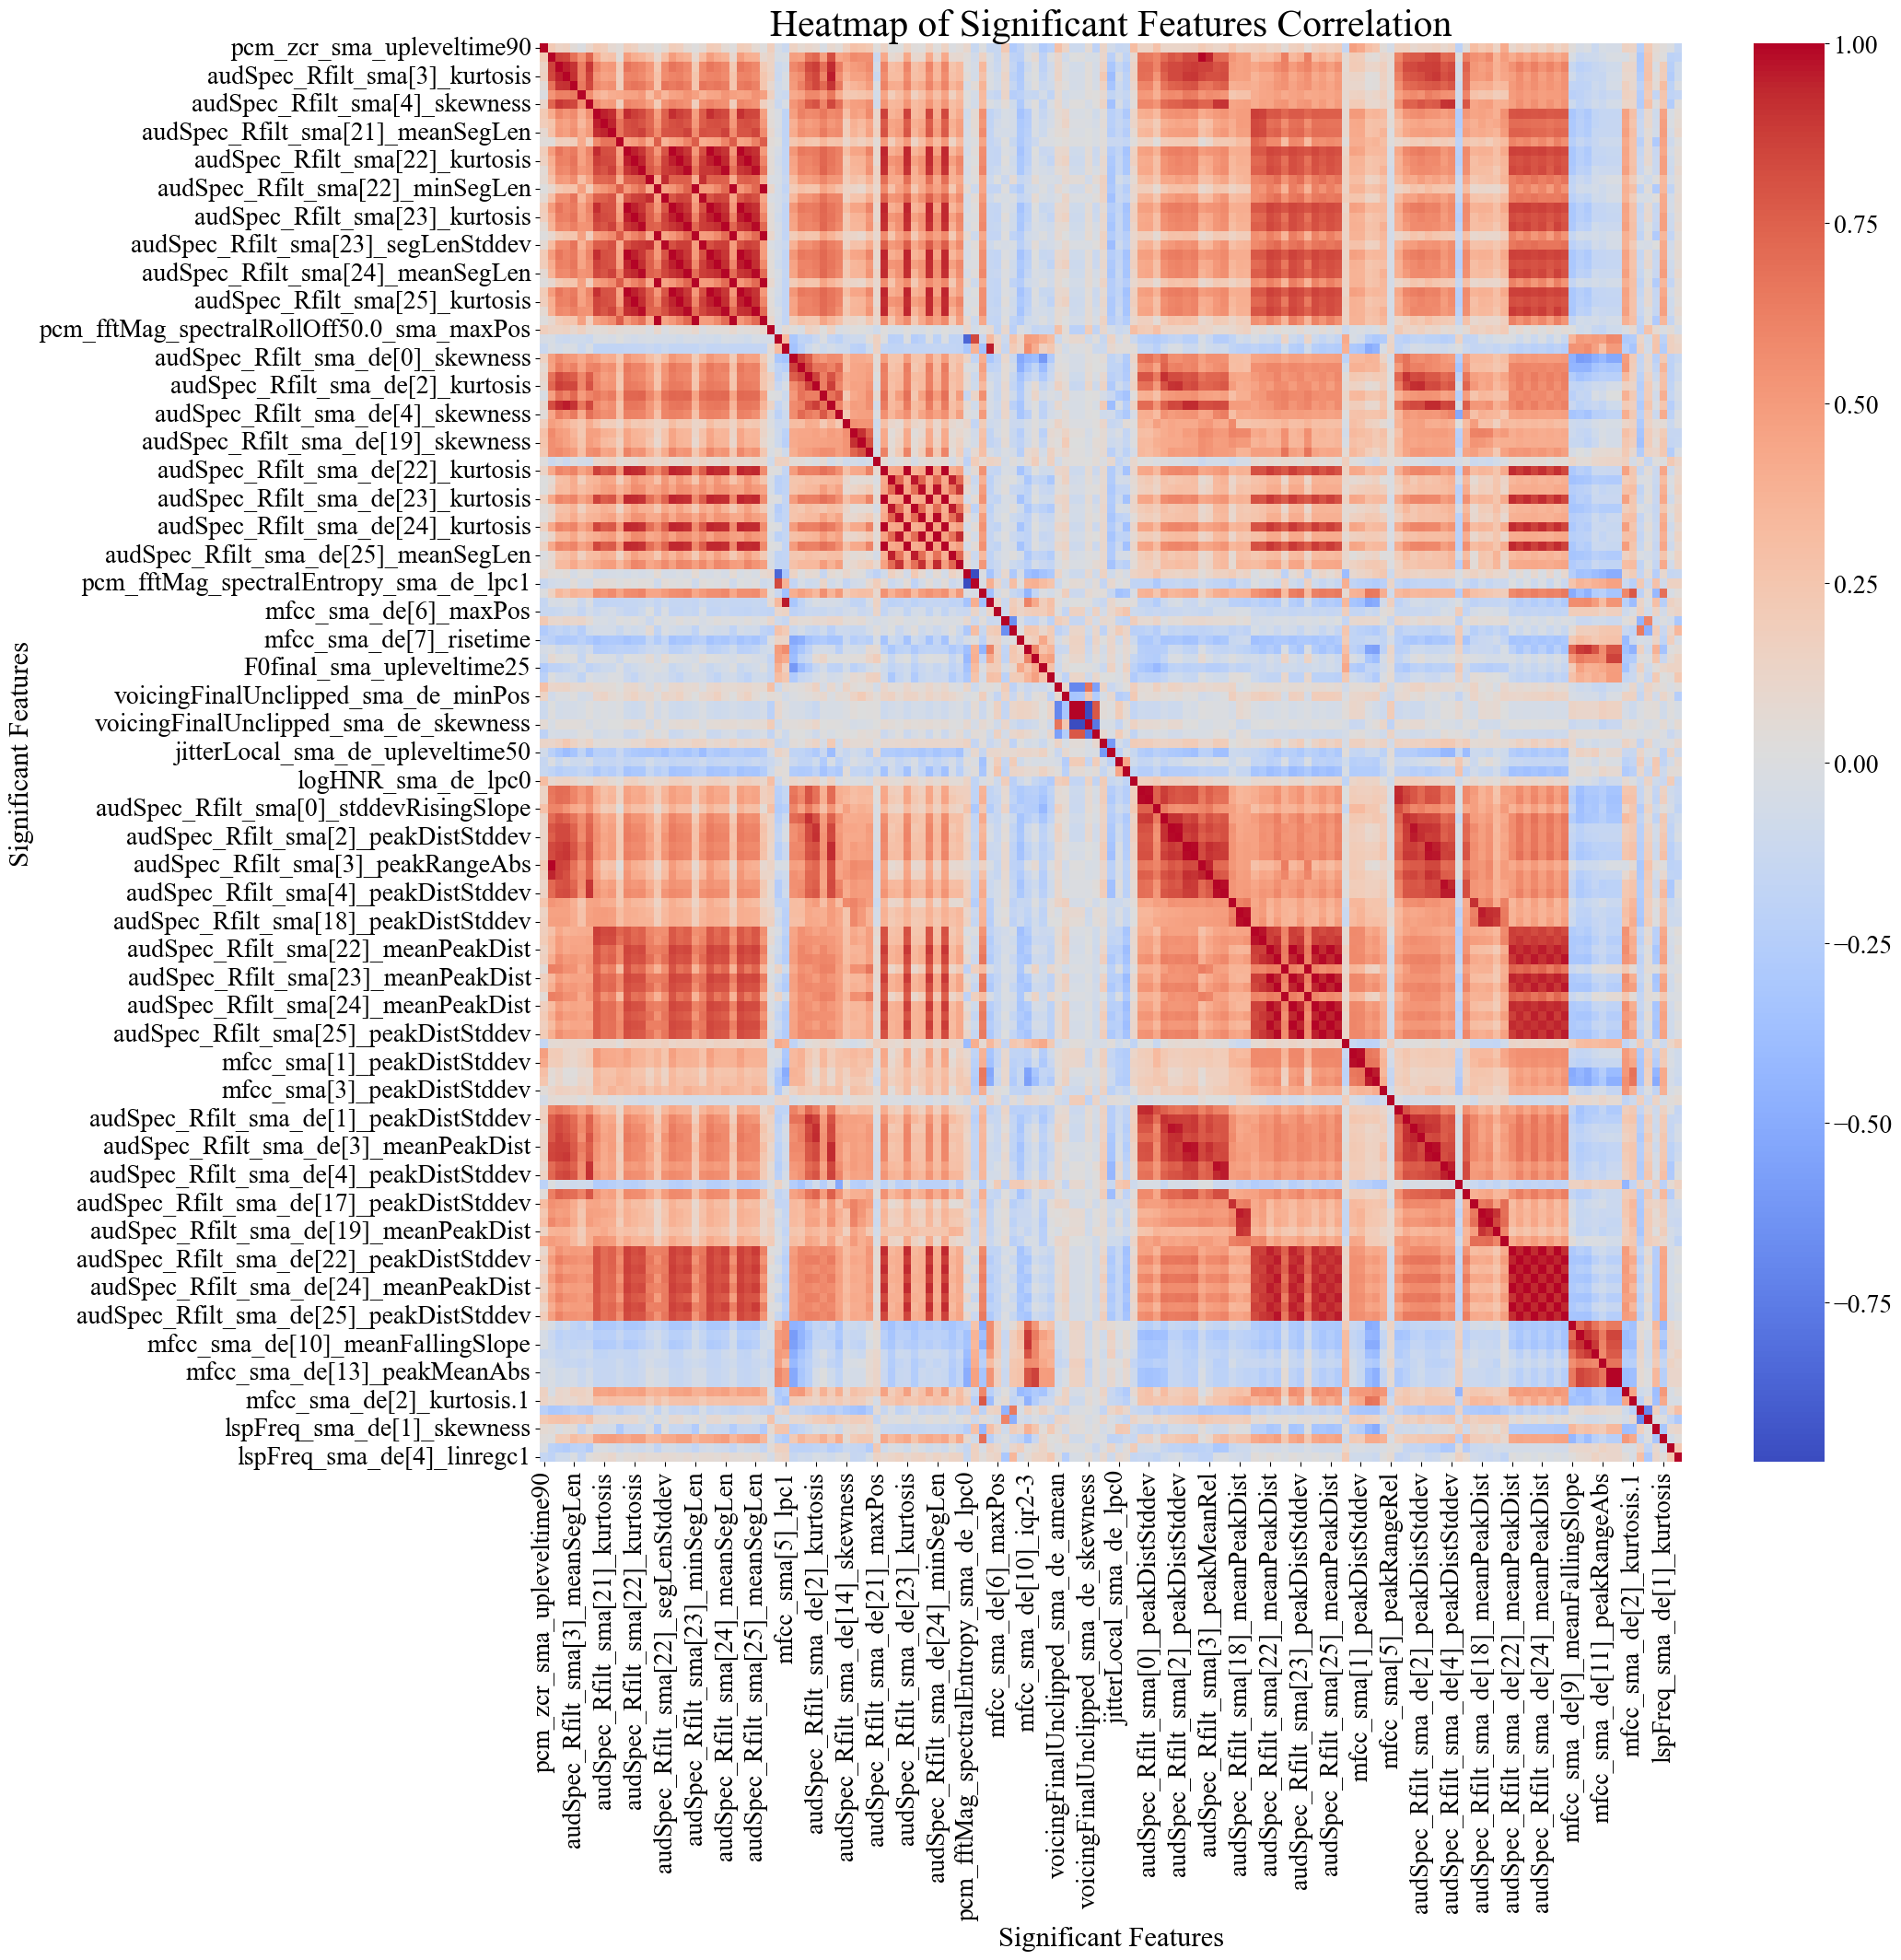

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 构造显著特征的DataFrame
significant_feature_names = significant_features['Feature'].values
significant_df = df[significant_feature_names]

# 计算显著特征之间的相关矩阵
correlation_matrix = significant_df.corr()

# 设置字体和样式
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# 绘制热图
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# 设置标题和坐标轴标签
plt.title('Heatmap of Significant Features Correlation', fontsize=30)
heatmap.set_xlabel('Significant Features', fontsize=22)
heatmap.set_ylabel('Significant Features', fontsize=22)

plt.show()


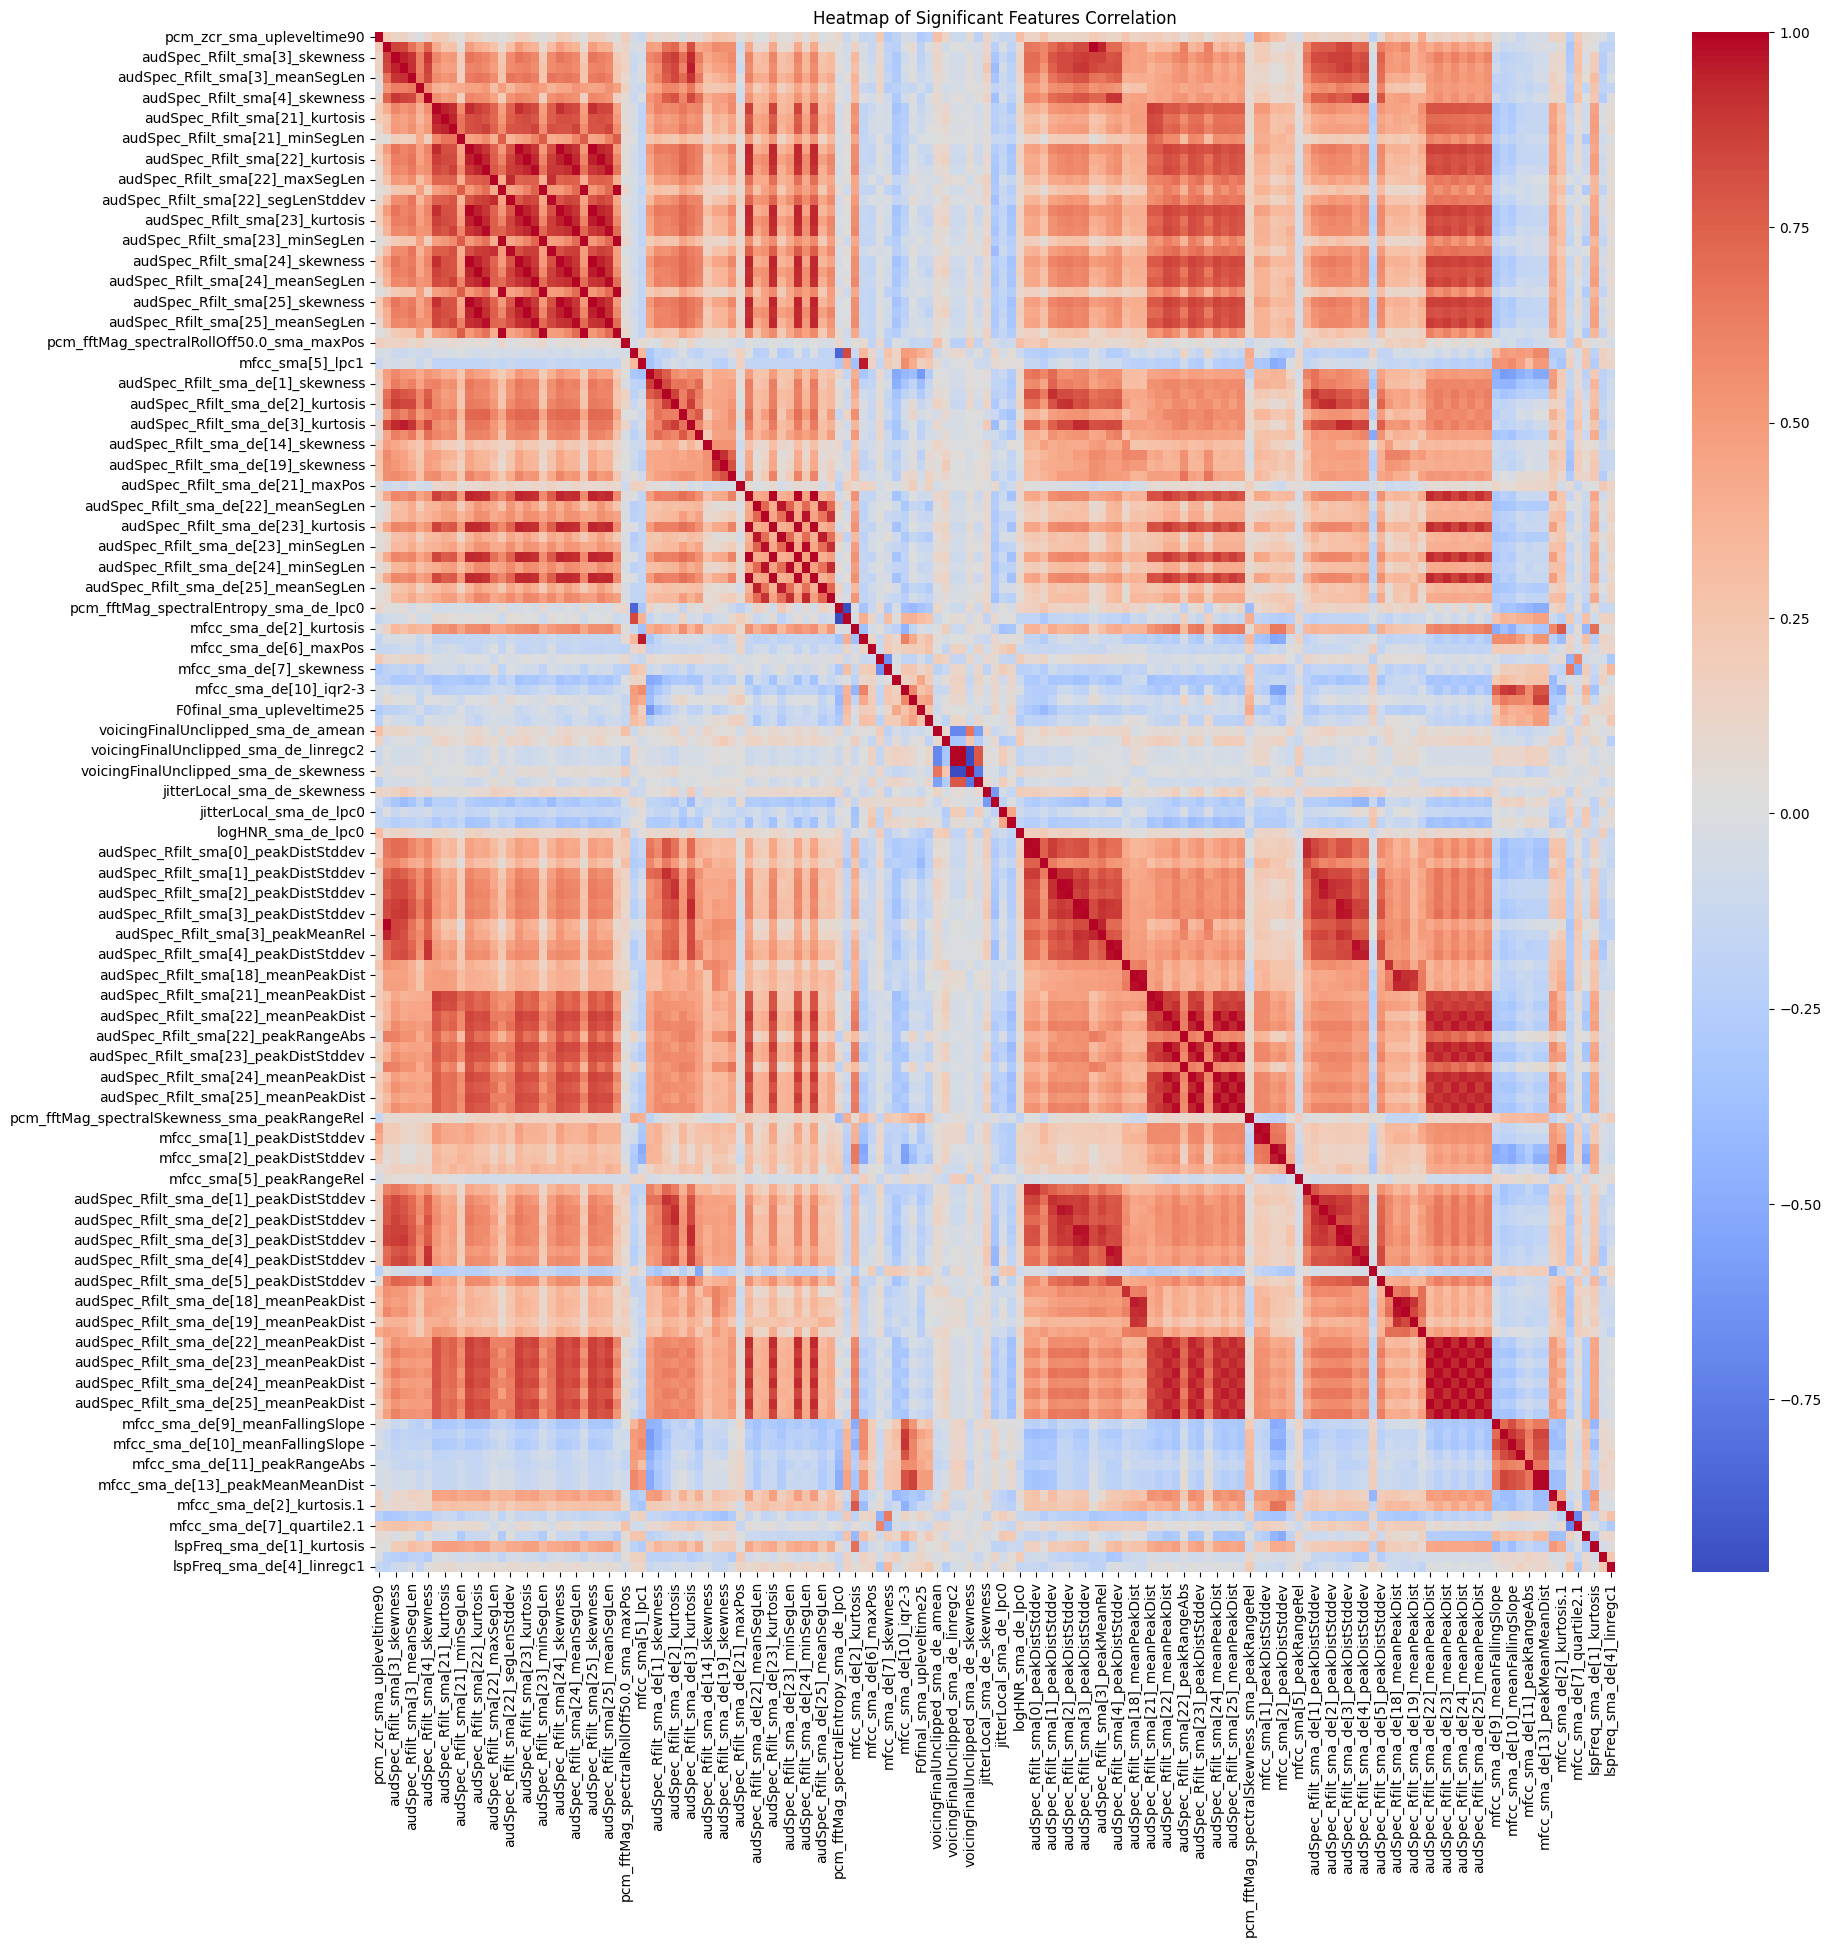

In [9]:
# 构造显著特征的DataFrame
significant_feature_names = significant_features['Feature'].values
significant_df = df[significant_feature_names]

# 计算显著特征之间的相关矩阵
correlation_matrix = significant_df.corr()

# 绘制热图
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap of Significant Features Correlation')
plt.show()
